<a href="https://colab.research.google.com/github/Otobi1/Back-to-Basics-A-Refresher-/blob/master/Back_to_Basics_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
## Neural Networks 

# - Here, we will explore Multi Layer Perceptrons (MLPs), which are a basic type of neural network

# - First, we attempt to motivate non-linear activation functions (fcl) by trying to fit a linear model (logistic regression) on our non-linear spiral data
# - Then we'll implement an MLP using just NumPy and then later on PyTorch
# REF - https://madewithml.com/courses/ml-foundations/neural-networks/ 

# Objective - predict the probability of class y given the inputs X. Non-linearity is introduced to model the complex, non-linear data

In [27]:
# Importing the necessary libraries 

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
SEED = 1234

In [29]:
# Set seed for reproducibility 

np.random.seed(SEED)

random.seed(SEED)

In [30]:
# Loading the data 

url = "https://raw.githubusercontent.com/GokuMohandas/madewithml/main/datasets/spiral.csv"
df = pd.read_csv(url, header = 0) # loading the data
df = df.sample(frac = 1).reset_index(drop = True) # Shuffle the data
df.head()

,X1,X2,color
0,0.106737,0.114197,c1
1,0.311513,-0.664028,c1
2,0.019870,-0.703126,c1
3,-0.054017,0.508159,c3
4,-0.127751,-0.011382,c3


In [31]:
# Exploring the data shapes 

X = df[["X1", "X2"]].values
y = df["color"].values

print (f"X: ", np.shape(X))
print (f"y: ", np.shape(y))

X:  (1500, 2)
y:  (1500,)


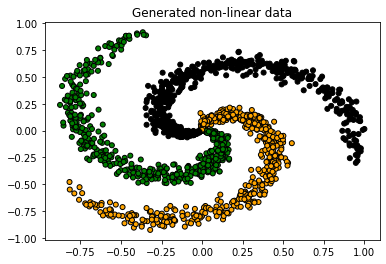

In [32]:
# Visualising the data 

plt.title("Generated non-linear data")
colors = {"c1": "orange", "c2": "green", "c3": "black"} # c1, c2, c3 are the classes within the colors column; this line just gives them some fun colors 
plt.scatter(X[:, 0], X[:, 1], c = [colors[_y] for _y in y], edgecolors = "k", s = 25)
plt.show()

In [33]:
# Splitting the data 

import collections 
from sklearn.model_selection import train_test_split

In [34]:
TRAIN_SIZE = 0.7 
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [35]:
def train_val_test_split(X, y, train_size):
  """Split dataset into data splits."""
  X_train, X_, y_train, y_ = train_test_split(X, y, train_size = TRAIN_SIZE, stratify = y)
  X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size = 0.5, stratify = y_)
  return (X_train, X_val, X_test, y_train, y_val, y_test)

In [36]:
# Creating the data splits using the function above 

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X = X, y = y, train_size = TRAIN_SIZE)

print (f"X_train: {X_train.shape}, y_train: {y_train.shape}") # Ensure you add (.shape) after so as not to print out the actual data (555 in Thai)
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} -> {y_train[0]}")

X_train: (1050, 2), y_train: (1050,)
X_val: (225, 2), y_val: (225,)
X_test: (225, 2), y_test: (225,)
Sample point: [-0.63919105 -0.69724176] -> c1


In [37]:
# Label Encoding 

# in previous lessons, we wrote the complete label encoder to check under the hood. For this lesson we'll use sklearns LabelEncoder class 

from sklearn.preprocessing import LabelEncoder

In [38]:
# Output vectoriser 

label_encoder = LabelEncoder()

In [39]:
# Fitting it on the train data 

label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print (f"classes: {classes}")

classes: ['c1', 'c2', 'c3']


In [40]:
# Convert labels to tokens 

print (f"y_train[0]: {y_train[0]}") # Here we are checking the first color (class/label in the training set before applying the label transformer)

y_train = label_encoder.transform(y_train) # Here for each, we are transforming the labels in each of the data splits 
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print (f"y_train[0]: {y_train[0]}") # Here, we want to check the transformed first color (class/label) in the training set

print (f"y_train[0:5]: {y_train[0:5]}") # Lets see the first 5 entries 

y_train[0]: c1
y_train[0]: 0
y_train[0:5]: [0 0 0 2 1]


In [52]:
# Class weights 

# - Here, we check how equal the different categories are distributed within the datset

counts = np.bincount(y_train) # Replace y_train here with y_val, or y_test to see the class distribution 

class_weights = {i: 1.0/count for i, count in enumerate(counts)}

print (f"counts: {counts}\nweights: {class_weights}")

counts: [350 350 350]
weights: {0: 0.002857142857142857, 1: 0.002857142857142857, 2: 0.002857142857142857}


In [53]:
# Standardising the data 

# Standardising (achieving zero mean and unit variance) such that a specific feature's magnitude doesnt affect how the model learns its weights
# We will only standardise the inputs X because our outputs y are class values

from sklearn.preprocessing import StandardScaler

In [54]:
# Standardise the data (mean = 0, std = 1) using training data

X_scaler = StandardScaler().fit(X_train)

In [55]:
# Apply scaler on training and test (do not standardise outputs for classification projects)

X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [56]:
# Check, the mean should be approx 0 and std should be approx 1

print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis = 0):.1f}, std: {np.std(X_test[:, 0], axis = 0):.1f}")
print (f"X_test[0]: mean: {np.mean(X_test[:, 1], axis = 0):.1f}, std: {np.std(X_test[:, 1], axis = 0):.1f}")

X_test[0]: mean: 0.1, std: 0.9
X_test[0]: mean: 0.0, std: 1.0
